In [15]:
from pathlib import Path

import numpy as np
import polars as pl
import lightgbm as lgb

In [16]:
path_total = Path("./Test_dat2_v2.csv")

df = pl.read_csv(path_total, infer_schema_length=1000)
display(df)

# x, yともに適用する処理
# nullが10以上ある行をdrop
# df = df.with_columns(pl.Series([row.count(None) for row in df.iter_rows()]).alias("null_count")).filter(pl.col("null_count") < 10).drop("null_count")

# x, yそれぞれに適用する処理
x = df.select(df.columns[:-4])
x = x.select(~ pl.selectors.ends_with("records"))
x = x.select(~ pl.selectors.ends_with("ID"))
x = x.select(~ pl.selectors.ends_with("Scientific name"))
# nullがk行を以下のカラムのみ採用
# x = x.select([col_name for col_name in x.columns if df[col_name].null_count() <=100])
x = x.select([col_name for col_name in x.columns if df[col_name].null_count() <=100 or "associate" in col_name.lower()])

# df = df.select([col_name for col_name in df.columns if df[col_name].null_count() <= 100 or (df.get_column_index(col_name) - df.width) >= -4])


ys = df.select(df.columns[-4:])


# # BlankをNに置き換え
# ys = ys.with_columns(
#     pl.when(pl.all().is_null())
#     .then(pl.lit("N"))
#     .otherwise(pl.all())
#     .name.keep()
# )

# NとYを0, 1に置き換え
ys = ys.with_columns(
    pl.when(pl.all() == "N")
    .then(pl.lit(0))
    .when(pl.all() == "Y")
    .then(pl.lit(1))
    .otherwise(pl.lit(2))
    .name.keep()
)

display(x)
display(ys)

ys.write_csv("./tmp.csv")



acceptedNameUsageID,Scientific name,Family_ID,Genus_ID,DDepth_Top,DDepth_Bottom,DDepth_midPoint,NDepth_Top,NDepth_Bottom,NDepth_midPoint,Lat0_Top,Lat0_Bottom,Lat0_midPoint,Lon0_Top,Lon0_Bottom,Lon0_midPoint,common size0_Top,common size0_Bottom,common size0_midPoint,max size0_Top,max size0_Bottom,max size0_midPoint,Temperature0_Top,Temperature0_Bottom,Temperature0_midPoint,Lon1_Top,Lon1_Bottom,Lon1_midPoint,max size1_Top,max size1_Bottom,max size1_midPoint,Lat1_Top,Lat1_Bottom,Lat1_midPoint,Depth2_Top,Depth2_Bottom,Depth2_midPoint,…,TemperatureT0_Bottom,TemperatureT0_Top,TemperatureT0_Average,TemperatureT0_# records,Aggregation0_Bottom,Aggregation0_Top,Aggregation0_Average,Aggregation0_# records,Associate0_Bottom,Associate0_Top,Associate0_Average,Associate_Floating object,Associate_Large pelagics,Behavior1_Bottom,Behavior1_Top,Behavior1_Average,Behavior1_# records,Food1_Bottom,Food1_Top,Food1_Average,Food1_# records,Habitat1_Bottom,Habitat1_Top,Habitat1_Average,Habitat1_# records,Salinity1_Bottom,Salinity1_Top,Salinity1_Average,Salinity1_# records,TemperatureT1_Bottom,TemperatureT1_Top,TemperatureT1_Average,TemperatureT1_# records,ICCAT Fisheries,LL,PS,Others
i64,str,i64,i64,i64,i64,f64,i64,i64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str,str,f64,i64,i64,str,i64,i64,str,…,f64,f64,f64,i64,i64,i64,f64,i64,f64,f64,f64,i64,i64,i64,f64,f64,i64,i64,f64,f64,i64,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str
105787,"""Carcharhinus a…",105689,105719,0,810,150.0,0,810,150.0,-31.0,46.0,null,-180.0,180.0,null,null,null,250.0,null,null,300.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,2.0,3.0,2.5,4,null,null,null,null,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,null
105788,"""Carcharhinus b…",105689,105719,0,200,50.0,0,200,50.0,-38.0,40.0,null,-100.0,155.0,null,null,null,250.0,null,null,300.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,2.0,3.0,2.5,4,1,4,2.5,2,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,"""Y"""
105789,"""Carcharhinus f…",105689,105719,0,500,259.0,0,500,259.0,-43.0,42.0,null,-180.0,180.0,null,null,null,250.0,null,null,350.0,null,null,23.0,null,null,null,null,null,null,null,null,null,null,null,null,…,2.6,2.6,2.6,1,null,null,null,null,2.0,3.1,2.55,1,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""","""Y""","""Y"""
105790,"""Carcharhinus g…",105689,105719,0,285,105.0,0,285,105.0,-34.0,36.0,null,-180.0,180.0,null,null,null,300.0,null,null,370.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,2.4,3.0,2.7,2,null,null,null,null,1.5,1.5,1.5,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,null
105791,"""Carcharhinus i…",105689,105719,0,20,10.0,0,20,10.0,-38.0,42.0,null,-100.0,-12.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,2.6,2.6,2.6,1,4,4,4.0,1,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,null
105792,"""Carcharhinus l…",105689,105719,0,164,15.5,0,164,15.5,-39.0,42.0,null,-180.0,180.0,null,null,null,260.0,null,null,360.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,2.4,3.0,2.666667,3,null,null,null,null,1.5,1.5,1.5,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""","""Y""","""Y"""
105793,"""Carcharhinus l…",105689,105719,0,140,15.0,0,140,15.0,-38.0,45.0,null,-180.0,180.0,null,null,null,150.0,null,null,286.0,null,null,null,null,null,null,null,null,null,null,null,null,null,

DDepth_Top,DDepth_Bottom,DDepth_midPoint,NDepth_Top,NDepth_Bottom,NDepth_midPoint,Lat0_Top,Lat0_Bottom,Lon0_Top,Lon0_Bottom,max size0_midPoint,Behavior0_Bottom,Behavior0_Top,Behavior0_Average,Habitat0_Bottom,Habitat0_Top,Habitat0_Average,Salinity0_Bottom,Salinity0_Top,Salinity0_Average,TemperatureT0_Bottom,TemperatureT0_Top,TemperatureT0_Average,Associate0_Bottom,Associate0_Top,Associate0_Average,Associate_Floating object,Associate_Large pelagics
i64,i64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,f64,f64,f64,f64,f64,f64,f64,i64,i64
0,810,150.0,0,810,150.0,-31.0,46.0,-180.0,180.0,300.0,2.0,2.0,2.0,1.5,3.0,2.357143,2,2,2.0,2.0,3.0,2.5,null,null,0.0,null,null
0,200,50.0,0,200,50.0,-38.0,40.0,-100.0,155.0,300.0,3.0,3.0,3.0,1.3,2.5,1.966667,2,2,2.0,2.0,3.0,2.5,null,null,0.0,null,null
0,500,259.0,0,500,259.0,-43.0,42.0,-180.0,180.0,350.0,3.2,3.2,3.2,1.3,3.0,2.22,2,2,2.0,2.6,2.6,2.6,2.0,3.1,2.55,1,1
0,285,105.0,0,285,105.0,-34.0,36.0,-180.0,180.0,370.0,3.0,3.0,3.0,1.3,3.0,2.15,2,2,2.0,2.4,3.0,2.7,1.5,1.5,1.5,null,null
0,20,10.0,0,20,10.0,-38.0,42.0,-100.0,-12.0,null,1.0,1.0,1.0,1.1,2.0,1.466667,2,2,2.0,2.6,2.6,2.6,null,null,0.0,null,null
0,164,15.5,0,164,15.5,-39.0,42.0,-180.0,180.0,360.0,1.0,3.0,2.0,0.0,2.5,1.4,0,2,1.0,2.4,3.0,2.666667,1.5,1.5,1.5,null,null
0,140,15.0,0,140,15.0,-38.0,45.0,-180.0,180.0,286.0,1.0,3.0,2.0,1.0,3.0,1.86,1,2,1.5,2.4,3.0,2.666667,null,null,0.0,null,null
0,1082,76.0,0,1082,76.0,-43.0,46.0,-180.0,180.0,400.0,3.2,3.2,3.2,2.0,3.0,2.625,2,2,2.0,2.0,3.0,2.533333,2.3,2.8,2.55,1,null
0,75,37.5,0,75,37.5,-25.0,35.0,-180.0,-134.0,null,null,null,null,1.0,2.5,1.525,1,2,1.5,2.6,3.0,2.8,1.2,1.2,1.2,null,null


ICCAT Fisheries,LL,PS,Others
i32,i32,i32,i32
1,1,2,2
1,1,2,1
1,1,1,1
1,1,2,2
1,1,2,2
1,1,1,1
1,1,2,1
1,1,1,1
1,1,2,2


In [17]:
# # Using scikit-learn API
# from sklearn.model_selection import train_test_split, KFold
# from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss

# import matplotlib.pyplot as plt
# import seaborn as sns



# params = {
#     "boosting_type": "gbdt",
#     "num_leaves": 31,
#     "max_depth": 10,
#     'objective':'binary',
#     "n_estimators": 100,
#     "learning_rate": 0.1,

#     "task": "train",
#     'metric':'binary_logloss',
#     'seed':0,
#     'verbosity': -1,
# }

# df_res_prob = None

# for y in ys:

#     for ri in range(25):
#         kf = KFold(n_splits=4, shuffle=True, random_state=ri)
#         proba = [None for i in range(len(x))]

#         met_dict = dict()
#         for fold, (train_indices, val_indices) in enumerate(kf.split(x)):
#             x_train, x_val = x[train_indices], x[val_indices]
#             y_train, y_val = y[train_indices], y[val_indices]
            
#             # x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)

#             model = lgb.LGBMClassifier(**params)
#             model.fit(x_train, y_train)

#             # y_pred = model.predict(x_val)
#             y_pred_proba = model.predict_proba(x_val)
#             y_pred = y_pred_proba.argmax(axis=1)

#             # print(f"{len(x_train)=}, {len(x_val)=}")

#             # テストデータの評価
#             acc = accuracy_score(y_val, y_pred)
#             f1 = f1_score(y_val, y_pred)
#             auc = roc_auc_score(y_val, y_pred)
#             logloss = log_loss(y_val, y_pred_proba)
#             cm = confusion_matrix(y_val, y_pred)
            
#             # print(model.feature_importances_)
            
#             if met_dict.get("acc") is None:
#                 met_dict["acc"] = [acc]
#             else:
#                 met_dict["acc"].append(acc)

#             if met_dict.get("f1") is None:
#                 met_dict["f1"] = [f1]
#             else:
#                 met_dict["f1"].append(f1)
            
#             if met_dict.get("auc") is None:
#                 met_dict["auc"] = [auc]
#             else:
#                 met_dict["auc"].append(auc)

#             if met_dict.get("logloss") is None:
#                 met_dict["logloss"] = [logloss]
#             else:
#                 met_dict["logloss"].append(logloss)

#             if met_dict.get("cm") is None:
#                 met_dict["cm"] = [cm]
#             else:
#                 met_dict["cm"].append(cm)

#             for i, idx in enumerate(val_indices):
#                 proba[idx] = y_pred_proba[i]
#         proba = np.stack(proba)

#         if met_dict.get("proba") is None:
#             met_dict["proba"] = [proba]
#         else:
#             met_dict["proba"].append(proba)
        
# # 各統計量の平均を算出
#     for k, v in met_dict.items():
#         if k == "proba":
#             proba = np.stack(v).mean(axis=0)
#         elif k == "cm":
#             cm = sum(met_dict["cm"])
#             print(cm)
#         else:
#             print(f"{k:8} = {sum(v) / len(v)}")


#     fig, ax = plt.subplots()
#     fig.set_figwidth(3)
#     fig.set_figheight(2.25)

#     ax = sns.heatmap(cm, annot=True, cbar=True, square=True, fmt="d", cmap="Blues_r", xticklabels=list(range(cm.shape[0])), yticklabels=list(range(cm.shape[1])))
#     ax.set_xlabel("pred_label")
#     ax.set_ylabel("true_label")
    
#     se_proba = pl.Series(proba[:, 1]).rename(y.name + "_prob")
#     if df_res_prob is None:
#         df_res_prob = se_proba.to_frame()
#     else:
#         df_res_prob = df_res_prob.with_columns(se_proba)
        
        
# # display(df_res_prob)

# df_res = df_res_prob.with_columns(
#     pl.when(pl.all() < 0.5)
#     .then(pl.lit("N"))
#     .otherwise(pl.lit("Y"))
#     .name
#     .map(lambda x: x[:-5] + "_pred")
# )

# # display(df_pred)






acc      = 0.8516561964591661
f1       = 0.7352686970934096
logloss  = 0.6278762035913704
[[ 16  13  12]
 [  3 188   8]
 [  8  17 146]]


ValueError: y contains previously unseen labels: [ 10  23 126]

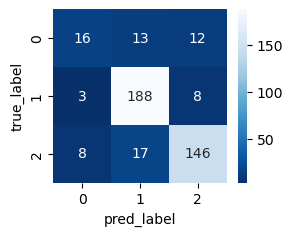

In [18]:
# Using scikit-learn API
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, log_loss

import matplotlib.pyplot as plt
import seaborn as sns



params = {
    "boosting_type": "gbdt",
    "num_leaves": 31,
    "max_depth": 10,
    'objective': 'multiclass',  # 3値分類の場合
    'num_class': 3,  # クラス数
    "n_estimators": 100,
    "learning_rate": 0.1,

    "task": "train",
    'metric': 'multi_logloss',  # 適切な評価指標を選択
    'seed': 0,
    'verbosity': -1,
}

df_res_prob = None

for y in ys:

    for ri in range(1):
        kf = KFold(n_splits=4, shuffle=True, random_state=ri)
        proba = [None for i in range(len(x))]

        met_dict = dict()
        for fold, (train_indices, val_indices) in enumerate(kf.split(x)):
            x_train, x_val = x[train_indices], x[val_indices]
            y_train, y_val = y[train_indices], y[val_indices]
            
            # x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75, random_state=0)

            model = lgb.LGBMClassifier(**params)
            model.fit(x_train, y_train)

            y_pred_tmp = model.predict(x_val)
            y_pred_proba = model.predict_proba(x_val)
            y_pred = y_pred_proba.argmax(axis=1)

            # print(f"{len(x_train)=}, {len(x_val)=}")

            # テストデータの評価
            acc = accuracy_score(y_val, y_pred)
            f1 = f1_score(y_val, y_pred, average="macro")
            # auc = roc_auc_score(y_val, y_pred)
            logloss = log_loss(y_val, y_pred_proba)
            cm = confusion_matrix(y_val, y_pred)
            
            # print(model.feature_importances_)
            
            if met_dict.get("acc") is None:
                met_dict["acc"] = [acc]
            else:
                met_dict["acc"].append(acc)

            if met_dict.get("f1") is None:
                met_dict["f1"] = [f1]
            else:
                met_dict["f1"].append(f1)
            
            # if met_dict.get("auc") is None:
            #     met_dict["auc"] = [auc]
            # else:
            #     met_dict["auc"].append(auc)

            if met_dict.get("logloss") is None:
                met_dict["logloss"] = [logloss]
            else:
                met_dict["logloss"].append(logloss)

            if met_dict.get("cm") is None:
                met_dict["cm"] = [cm]
            else:
                met_dict["cm"].append(cm)

            for i, idx in enumerate(val_indices):
                proba[idx] = y_pred_proba[i]
        proba = np.stack(proba)

        if met_dict.get("proba") is None:
            met_dict["proba"] = [proba]
        else:
            met_dict["proba"].append(proba)
        
# 各統計量の平均を算出
    for k, v in met_dict.items():
        if k == "proba":
            proba = np.stack(v).mean(axis=0)
        elif k == "cm":
            cm = sum(met_dict["cm"])
            print(cm)
        else:
            print(f"{k:8} = {sum(v) / len(v)}")


    fig, ax = plt.subplots()
    fig.set_figwidth(3)
    fig.set_figheight(2.25)

    ax = sns.heatmap(cm, annot=True, cbar=True, square=True, fmt="d", cmap="Blues_r", xticklabels=list(range(cm.shape[0])), yticklabels=list(range(cm.shape[1])))
    ax.set_xlabel("pred_label")
    ax.set_ylabel("true_label")
    
    se_proba = pl.Series(proba[:, 1]).rename(y.name + "_prob")
    if df_res_prob is None:
        df_res_prob = se_proba.to_frame()
    else:
        df_res_prob = df_res_prob.with_columns(se_proba)
        
        
# display(df_res_prob)

df_res = df_res_prob.with_columns(
    pl.when(pl.all() < 0.5)
    .then(pl.lit("N"))
    .otherwise(pl.lit("Y"))
    .name
    .map(lambda x: x[:-5] + "_pred")
)

# display(df_pred)






In [ ]:
df_pred = pl.concat([df, df_res], how="horizontal")

display(df_pred)
df_pred.write_csv("./prediction.csv")

acceptedNameUsageID,Scientific name,Family_ID,Genus_ID,DDepth_Top,DDepth_Bottom,DDepth_midPoint,NDepth_Top,NDepth_Bottom,NDepth_midPoint,Lat0_Top,Lat0_Bottom,Lat0_midPoint,Lon0_Top,Lon0_Bottom,Lon0_midPoint,common size0_Top,common size0_Bottom,common size0_midPoint,max size0_Top,max size0_Bottom,max size0_midPoint,Temperature0_Top,Temperature0_Bottom,Temperature0_midPoint,Lon1_Top,Lon1_Bottom,Lon1_midPoint,max size1_Top,max size1_Bottom,max size1_midPoint,Lat1_Top,Lat1_Bottom,Lat1_midPoint,Depth2_Top,Depth2_Bottom,Depth2_midPoint,…,Associate0_Bottom,Associate0_Top,Associate0_Average,Associate_Floating object,Associate_Large pelagics,Behavior1_Bottom,Behavior1_Top,Behavior1_Average,Behavior1_# records,Food1_Bottom,Food1_Top,Food1_Average,Food1_# records,Habitat1_Bottom,Habitat1_Top,Habitat1_Average,Habitat1_# records,Salinity1_Bottom,Salinity1_Top,Salinity1_Average,Salinity1_# records,TemperatureT1_Bottom,TemperatureT1_Top,TemperatureT1_Average,TemperatureT1_# records,ICCAT Fisheries,LL,PS,Others,ICCAT Fisheries_prob,LL_prob,PS_prob,Others_prob,ICCAT Fisheries_pred,LL_pred,PS_pred,Others_pred
i64,str,i64,i64,i64,i64,f64,i64,i64,f64,f64,f64,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,i64,i64,str,str,str,f64,i64,i64,str,i64,i64,str,…,f64,f64,f64,i64,i64,i64,f64,f64,i64,i64,f64,f64,i64,f64,i64,f64,i64,i64,i64,i64,i64,i64,i64,f64,i64,str,str,str,str,f64,f64,f64,f64,str,str,str,str
105787,"""Carcharhinus a…",105689,105719,0,810,150.0,0,810,150.0,-31.0,46.0,null,-180.0,180.0,null,null,null,250.0,null,null,300.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,null,0.998945,0.994573,0.068681,0.13018,"""Y""","""Y""","""N""","""N"""
105788,"""Carcharhinus b…",105689,105719,0,200,50.0,0,200,50.0,-38.0,40.0,null,-100.0,155.0,null,null,null,250.0,null,null,300.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,"""Y""",0.997646,0.982527,0.017169,0.004829,"""Y""","""Y""","""N""","""N"""
105789,"""Carcharhinus f…",105689,105719,0,500,259.0,0,500,259.0,-43.0,42.0,null,-180.0,180.0,null,null,null,250.0,null,null,350.0,null,null,23.0,null,null,null,null,null,null,null,null,null,null,null,null,…,2.0,3.1,2.55,1,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""","""Y""","""Y""",0.986489,0.32745,0.731804,0.17226,"""Y""","""N""","""Y""","""N"""
105790,"""Carcharhinus g…",105689,105719,0,285,105.0,0,285,105.0,-34.0,36.0,null,-180.0,180.0,null,null,null,300.0,null,null,370.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,1.5,1.5,1.5,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,null,0.999767,0.996082,0.649578,0.774018,"""Y""","""Y""","""Y""","""Y"""
105791,"""Carcharhinus i…",105689,105719,0,20,10.0,0,20,10.0,-38.0,42.0,null,-100.0,-12.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,null,null,0.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""",null,null,0.961392,0.855163,0.020618,0.010326,"""Y""","""Y""","""N""","""N"""
105792,"""Carcharhinus l…",105689,105719,0,164,15.5,0,164,15.5,-39.0,42.0,null,-180.0,180.0,null,null,null,260.0,null,null,360.0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,…,1.5,1.5,1.5,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,"""Y""","""Y""","""Y""","""Y""",0.998362,0.960103,0.182406,0.465254,"""Y""","""Y""","""N""","""N"""
105793,"""Carcharhinus l…",105689,105719,0,140